In [1]:
# importing the moduels
import pandas as pd
import requests
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# creating crime data frame
crime_df = pd.read_csv("Resources/Crime_Data_from_2020_to_present.csv")
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
crime_df.fillna(0, inplace= True)


In [4]:
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,0.0,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,0.0,0.0,1000 S FLOWER ST,0,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,0.0,0.0,0.0,1400 W 37TH ST,0,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,0.0,0.0,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,0.0,0.0,0.0,1900 TRANSIENT,0,34.0944,-118.3277


In [5]:
# cleaning the date reported and the date occured column to remove the 12:00:00
crime_df["Date Rptd"] = crime_df["Date Rptd"].str.split().str[0]
crime_df["DATE OCC"] = crime_df["DATE OCC"].str.split().str[0]
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020,03/01/2020,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,0.0,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506
1,200106753,02/09/2020,02/08/2020,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,0.0,0.0,1000 S FLOWER ST,0,34.0444,-118.2628
2,200320258,11/11/2020,11/04/2020,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,0.0,0.0,0.0,1400 W 37TH ST,0,34.0210,-118.3002
3,200907217,05/10/2023,03/10/2020,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,0.0,0.0,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387
4,220614831,08/18/2022,08/17/2020,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,0.0,0.0,0.0,1900 TRANSIENT,0,34.0944,-118.3277


In [14]:
# definig whether a crime committed occurred during the day or at night

# Convert the "TIME OCC" column to a string for comparison
crime_df["TIME OCC"] = crime_df["TIME OCC"].apply(lambda x: str(x))

# Convert the 'TIME OCC' column to integers
crime_df['TIME OCC'] = crime_df['TIME OCC'].astype(int)

# Create a function to determine if it's day or night based on the time
def day_or_night(time):
    if time >= 600 and time < 1800:
        return 'Day'
    else:
        return 'Night'

# Apply the function to create the 'Day or Night' column
crime_df['Day or Night'] = crime_df['TIME OCC'].apply(day_or_night)
crime_df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Hour,Day or Night
0,190326475,03/01/2020,03/01/2020,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510.0,998.0,0.0,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506,21,Night
1,200106753,02/09/2020,02/08/2020,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998.0,0.0,0.0,1000 S FLOWER ST,0,34.0444,-118.2628,18,Night
2,200320258,11/11/2020,11/04/2020,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,0.0,0.0,0.0,1400 W 37TH ST,0,34.0210,-118.3002,17,Day
3,200907217,05/10/2023,03/10/2020,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,0.0,0.0,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387,20,Night
4,220614831,08/18/2022,08/17/2020,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354.0,0.0,0.0,0.0,1900 TRANSIENT,0,34.0944,-118.3277,12,Day


In [18]:
# setting the column names to start with a capital letter 
crime_df.columns = [col.title() for col in crime_df.columns]
crime_df.head(5)

,Dr_No,Date Rptd,Date Occ,Time Occ,Area,Area Name,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Location,Cross Street,Lat,Lon,Hour,Day Or Night
0,190326475,03/01/2020,03/01/2020,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510.0,998.0,0.0,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506,21,Night
1,200106753,02/09/2020,02/08/2020,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998.0,0.0,0.0,1000 S FLOWER ST,0,34.0444,-118.2628,18,Night
2,200320258,11/11/2020,11/04/2020,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,0.0,0.0,0.0,1400 W 37TH ST,0,34.0210,-118.3002,17,Day
3,200907217,05/10/2023,03/10/2020,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,0.0,0.0,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387,20,Night
4,220614831,08/18/2022,08/17/2020,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354.0,0.0,0.0,0.0,1900 TRANSIENT,0,34.0944,-118.3277,12,Day


In [24]:
# creating a data frame with just selected information 
selected_columns = ["Date Rptd", "Date Occ", "Time Occ", "Day Or Night", "Crm Cd"]
date_time_df = crime_df[selected_columns]
date_time_df.head()

,Date Rptd,Date Occ,Time Occ,Day Or Night,Crm Cd
0,03/01/2020,03/01/2020,2130,Night,510
1,02/09/2020,02/08/2020,1800,Night,330
2,11/11/2020,11/04/2020,1700,Day,480
3,05/10/2023,03/10/2020,2037,Night,343
4,08/18/2022,08/17/2020,1200,Day,354


In [34]:
# creating a new column called "Day of Week" from the "Date Reported" and "Date Occurred"
date_time_df.loc[:, "Date Rptd"] = pd.to_datetime(date_time_df["Date Rptd"])
date_time_df.loc[:, "Date Occ"] = pd.to_datetime(date_time_df["Date Occ"])
date_time_df.loc[:, "Day Of Wk Occ"] = date_time_df["Date Occ"].dt.day_name()
date_time_df.loc[:, "Month Occ"] = date_time_df["Date Occ"].dt.month_name()
date_time_df.loc[:, "Time From Occ to Rptd"] = (date_time_df["Date Rptd"] - date_time_df["Date Occ"]).dt.days
date_time_df.loc[:, "Year Occ"] = date_time_df["Date Occ"].dt.year
date_time_df

,Date Rptd,Date Occ,Time Occ,Day Or Night,Crm Cd,Day Of Wk Occ,Month Occ,Time From Occ to Rptd,Year Occ
0,2020-03-01,2020-03-01,2130,Night,510,Sunday,March,0,2020
1,2020-02-09,2020-02-08,1800,Night,330,Saturday,February,1,2020
2,2020-11-11,2020-11-04,1700,Day,480,Wednesday,November,7,2020
3,2023-05-10,2020-03-10,2037,Night,343,Tuesday,March,1156,2020
4,2022-08-18,2020-08-17,1200,Day,354,Monday,August,731,2020
...,...,...,...,...,...,...,...,...,...
966946,2024-01-16,2024-01-16,1510,Day,624,Tuesday,January,0,2024
966947,2024-07-24,2024-07-23,1400,Day,510,Tuesday,July,1,2024
966948,2024-01-15,2024-01-15,100,Night,745,Monday,January,0,2024
966949,2024-07-19,2024-07-19,757,Day,888,Friday,July,0,2024


In [37]:
# creating a way to view if an crime happened on the weekend or a weekday
# date_time_df["Day Of Wk Occ"] = pd.to_datetime(date_time_df["Day Of Wk Occ"])
date_time_df.loc[:, "Day Of Week"] = date_time_df["Date Occ"].dt.dayofweek
# since i have already converted the "Date Occ" and "Date Rptd" to datetime im just looking for the day type
date_time_df.loc[:, "Day Type Crm Occ"] = date_time_df["Day Of Week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")
date_time_df["Day Type Crm Occ"].value_counts()

Day Type Crm Occ
Weekday    690714
Weekend    276237
Name: count, dtype: int64

In [38]:
date_time_df.to_csv("Resources/date_time.csv", index=False) 

In [39]:
date_time_df.columns

Index(['Date Rptd', 'Date Occ', 'Time Occ', 'Day Or Night', 'Crm Cd',
       'Day Of Wk Occ', 'Month Occ', 'Time From Occ to Rptd', 'Year Occ',
       'Day Of Week', 'Day Type Crm Occ'],
      dtype='object')

In [40]:
# need to split the data frame into one for each year (2020, 2021, 2022, 2023, 2024)

# setting the columns i want for the new data frame
columns = ['Date Rptd', 'Date Occ', 'Time Occ', 'Day Or Night', 'Crm Cd',
       'Day Of Wk Occ', 'Month Occ', 'Time From Occ to Rptd', 'Year Occ',
       'Day Of Week', 'Day Type Crm Occ']

# creating the data frames based on year
crime_2020 = date_time_df.loc[date_time_df["Year Occ"] == 2020, columns]
crime_2021 = date_time_df.loc[date_time_df["Year Occ"] == 2021, columns]
crime_2022 = date_time_df.loc[date_time_df["Year Occ"] == 2022, columns]
crime_2023 = date_time_df.loc[date_time_df["Year Occ"] == 2023, columns]
crime_2024 = date_time_df.loc[date_time_df["Year Occ"] == 2024, columns]


In [41]:
# creating csv files for the years 
# crime_2020.to_csv("Resources/crime_2020.csv", index=False)
# crime_2021.to_csv("Resources/crime_2021.csv", index=False)
# crime_2022.to_csv("Resources/crime_2022.csv", index=False)
# crime_2023.to_csv("Resources/crime_2023.csv", index=False)
# crime_2024.to_csv("Resources/crime_2024.csv", index=False)

In [42]:
print("Top 5 times")
print(crime_2020["Time Occ"].value_counts().head(5))

Top 5 times
Time Occ
1200    8060
1800    5811
1700    5572
2000    5399
1900    4929
Name: count, dtype: int64


In [43]:
print("Top 5 Crm Cd for 2020")
print(crime_2020["Crm Cd"].value_counts().head(5))
print("Top 5 Crm Cd for 2021")
print(crime_2021["Crm Cd"].value_counts().head(5))
print("Top 5 Crm Cd for 2022")
print(crime_2022["Crm Cd"].value_counts().head(5))
print("Top 5 Crm Cd for 2023")
print(crime_2023["Crm Cd"].value_counts().head(5))
print("Top 5 Crm Cd for 2024")
print(crime_2024["Crm Cd"].value_counts().head(5))


Top 5 Crm Cd for 2020
Crm Cd
510    20772
624    16331
740    12927
310    12837
330    12714
Name: count, dtype: int64
Top 5 Crm Cd for 2021
Crm Cd
510    23682
624    16198
740    13680
330    13478
230    12738
Name: count, dtype: int64
Top 5 Crm Cd for 2022
Crm Cd
510    24732
354    22095
624    18058
330    14230
310    14069
Name: count, dtype: int64
Top 5 Crm Cd for 2023
Crm Cd
510    24459
624    18832
310    14287
330    13552
354    13431
Name: count, dtype: int64
Top 5 Crm Cd for 2024
Crm Cd
510    13704
330     6154
442     5621
740     5567
440     5241
Name: count, dtype: int64


In [44]:
# creating a plot to show the trend
# soritng data to be in order
# grouping data by "Date Occ"
aggregated_2020 = crime_2020.groupby("Date Occ").size().reset_index(name='total_count')
print(aggregated_2020.value_counts().head(5))
aggregated_2021 = crime_2021.groupby("Date Occ").size().reset_index(name='total_count')
print(aggregated_2021.value_counts().head(5))
aggregated_2022 = crime_2022.groupby("Date Occ").size().reset_index(name='total_count')
print(aggregated_2022.value_counts().head(5))
aggregated_2023 = crime_2023.groupby("Date Occ").size().reset_index(name='total_count')
print(aggregated_2023.value_counts().head(5))
aggregated_2024 = crime_2024.groupby("Date Occ").size().reset_index(name='total_count')
print(aggregated_2024.value_counts().head(5))


Date Occ    total_count
2020-01-01  1151           1
2020-09-08  525            1
2020-09-06  547            1
2020-09-05  545            1
2020-09-04  573            1
Name: count, dtype: int64
Date Occ    total_count
2021-01-01  959            1
2021-09-09  589            1
2021-09-07  553            1
2021-09-06  624            1
2021-09-05  637            1
Name: count, dtype: int64
Date Occ    total_count
2022-01-01  997            1
2022-09-09  657            1
2022-09-07  613            1
2022-09-06  635            1
2022-09-05  634            1
Name: count, dtype: int64
Date Occ    total_count
2023-01-01  1139           1
2023-09-09  709            1
2023-09-07  581            1
2023-09-06  600            1
2023-09-05  599            1
Name: count, dtype: int64
Date Occ    total_count
2024-01-01  720            1
2024-05-29  239            1
2024-05-18  254            1
2024-05-19  209            1
2024-05-20  245            1
Name: count, dtype: int64


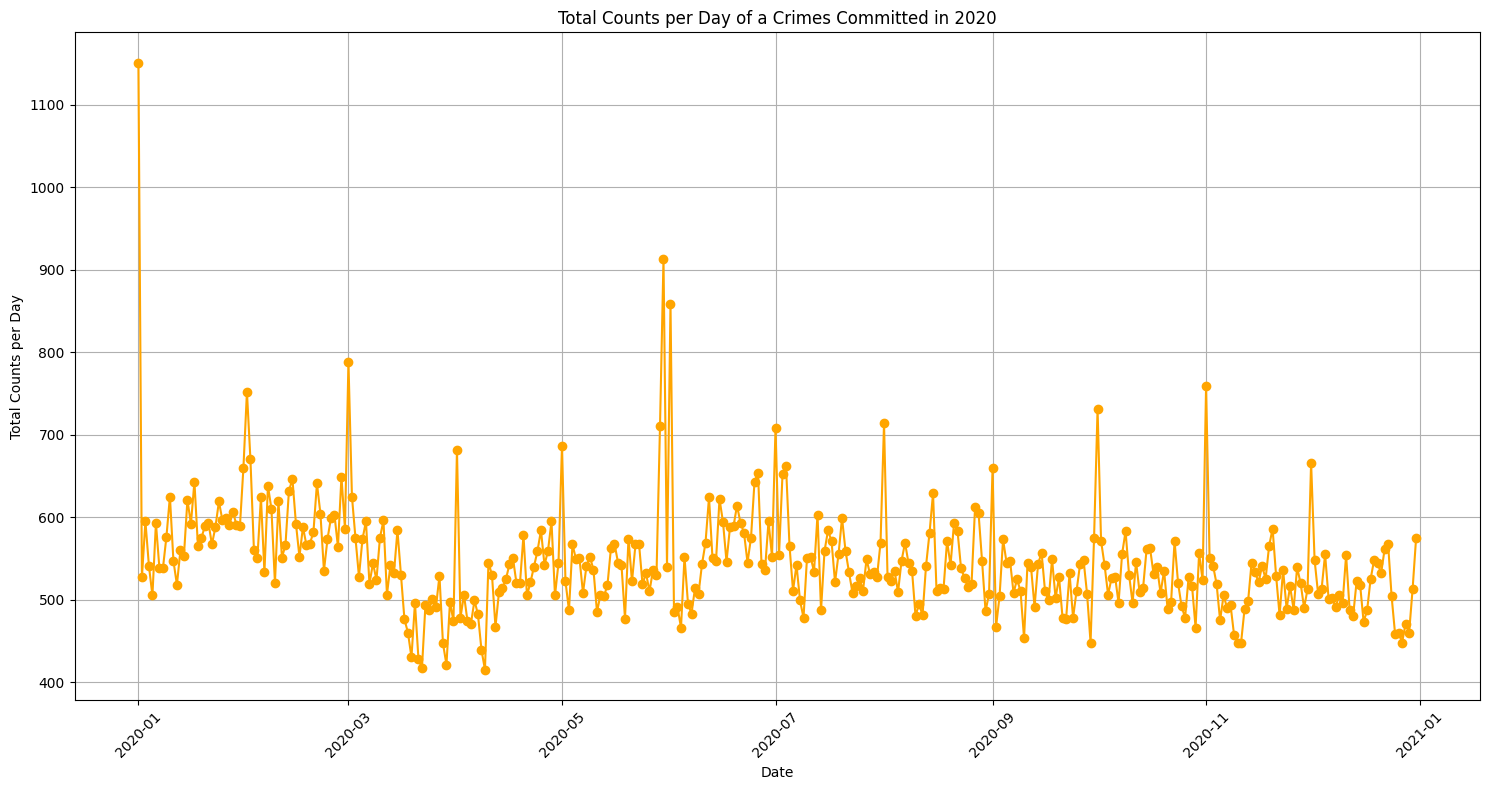

In [45]:
# Sort the aggregated data by date
aggregated_2020 = aggregated_2020.sort_values(by = "Date Occ")

# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(aggregated_2020["Date Occ"], aggregated_2020["total_count"], marker='o', color='orange', linestyle='-')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Counts per Day')
plt.title('Total Counts per Day of a Crimes Committed in 2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

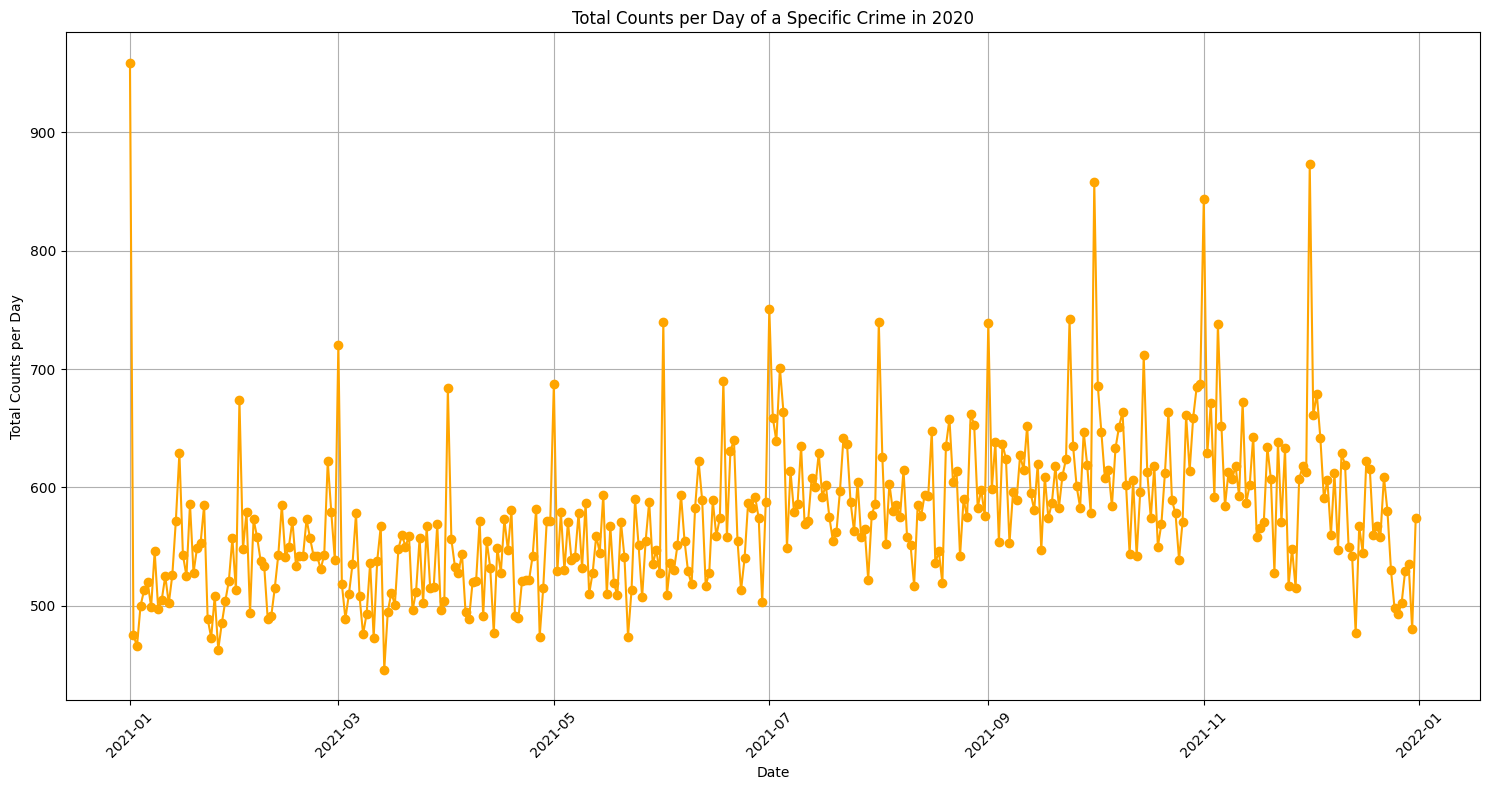

In [46]:
# Sort the aggregated data by date
aggregated_2021 = aggregated_2021.sort_values(by = "Date Occ")

# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(aggregated_2021["Date Occ"], aggregated_2021["total_count"], marker='o', color='orange', linestyle='-')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Counts per Day')
plt.title('Total Counts per Day of a Specific Crime in 2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

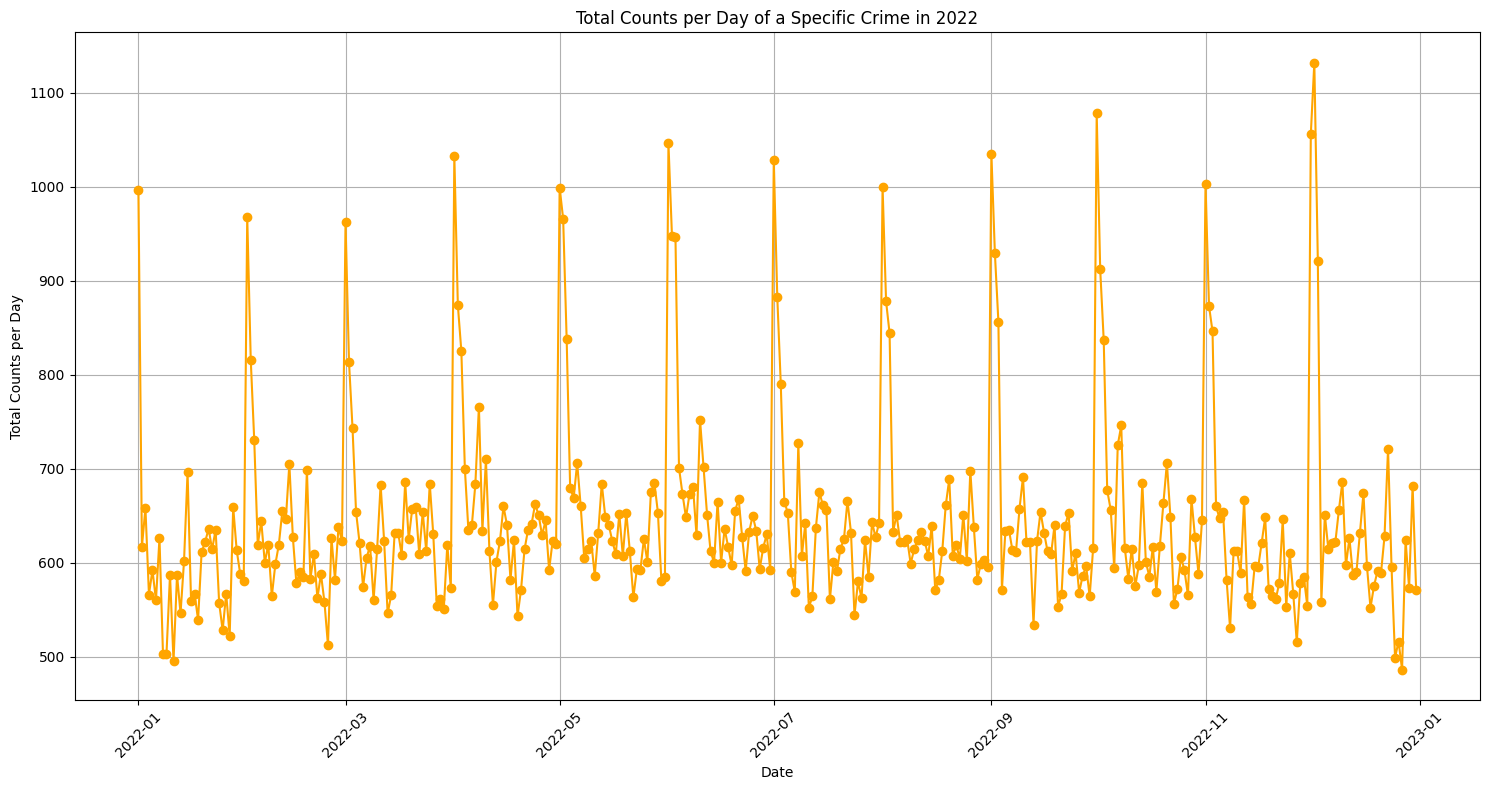

In [47]:
# Sort the aggregated data by date
aggregated_2022 = aggregated_2022.sort_values(by = "Date Occ")

# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(aggregated_2022["Date Occ"], aggregated_2022["total_count"], marker='o', color='orange', linestyle='-')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Counts per Day')
plt.title('Total Counts per Day of a Specific Crime in 2022')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

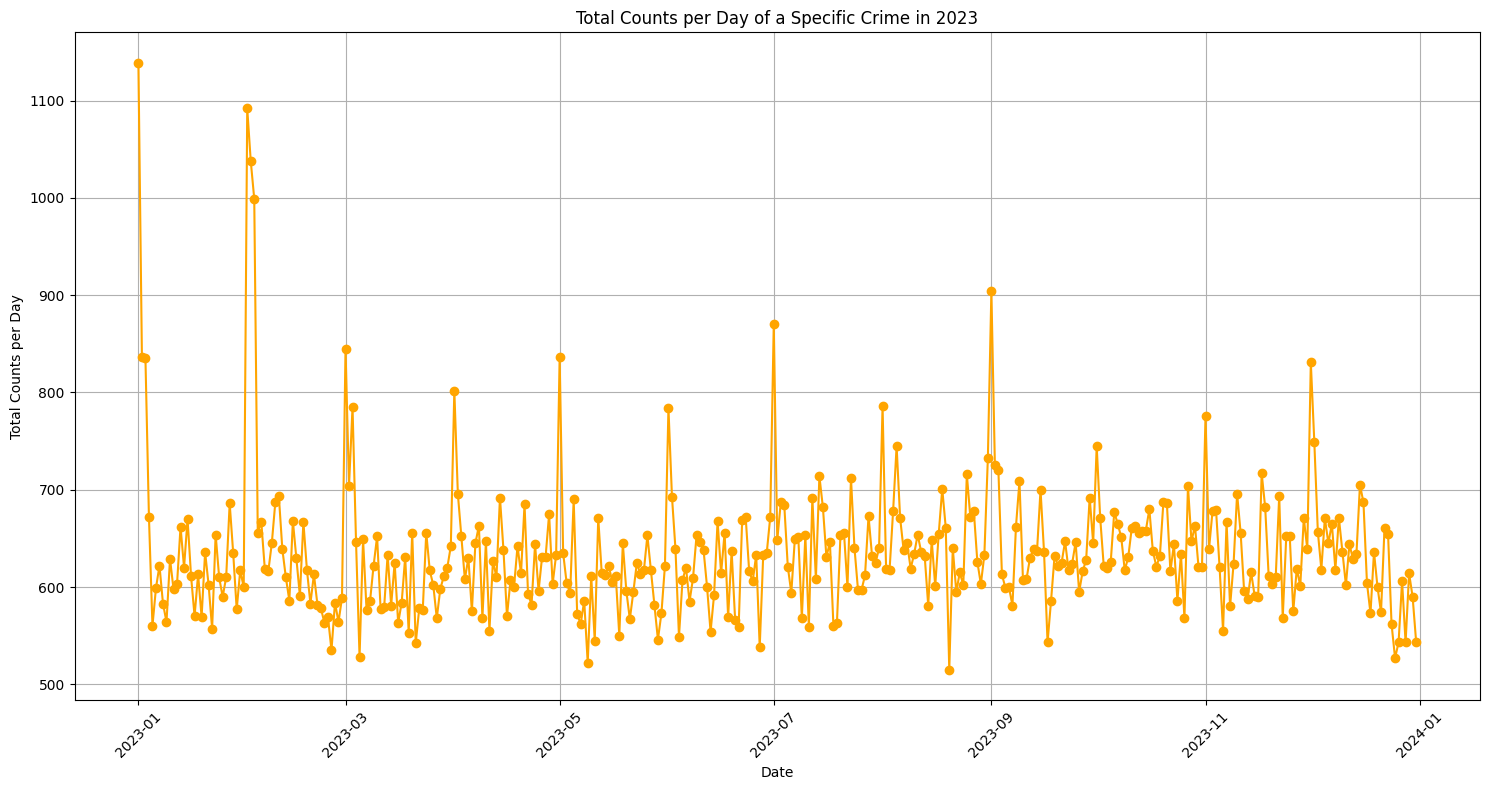

In [48]:
# Sort the aggregated data by date
aggregated_2023 = aggregated_2023.sort_values(by = "Date Occ")

# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(aggregated_2023["Date Occ"], aggregated_2023["total_count"], marker='o', color='orange', linestyle='-')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Counts per Day')
plt.title('Total Counts per Day of a Specific Crime in 2023')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

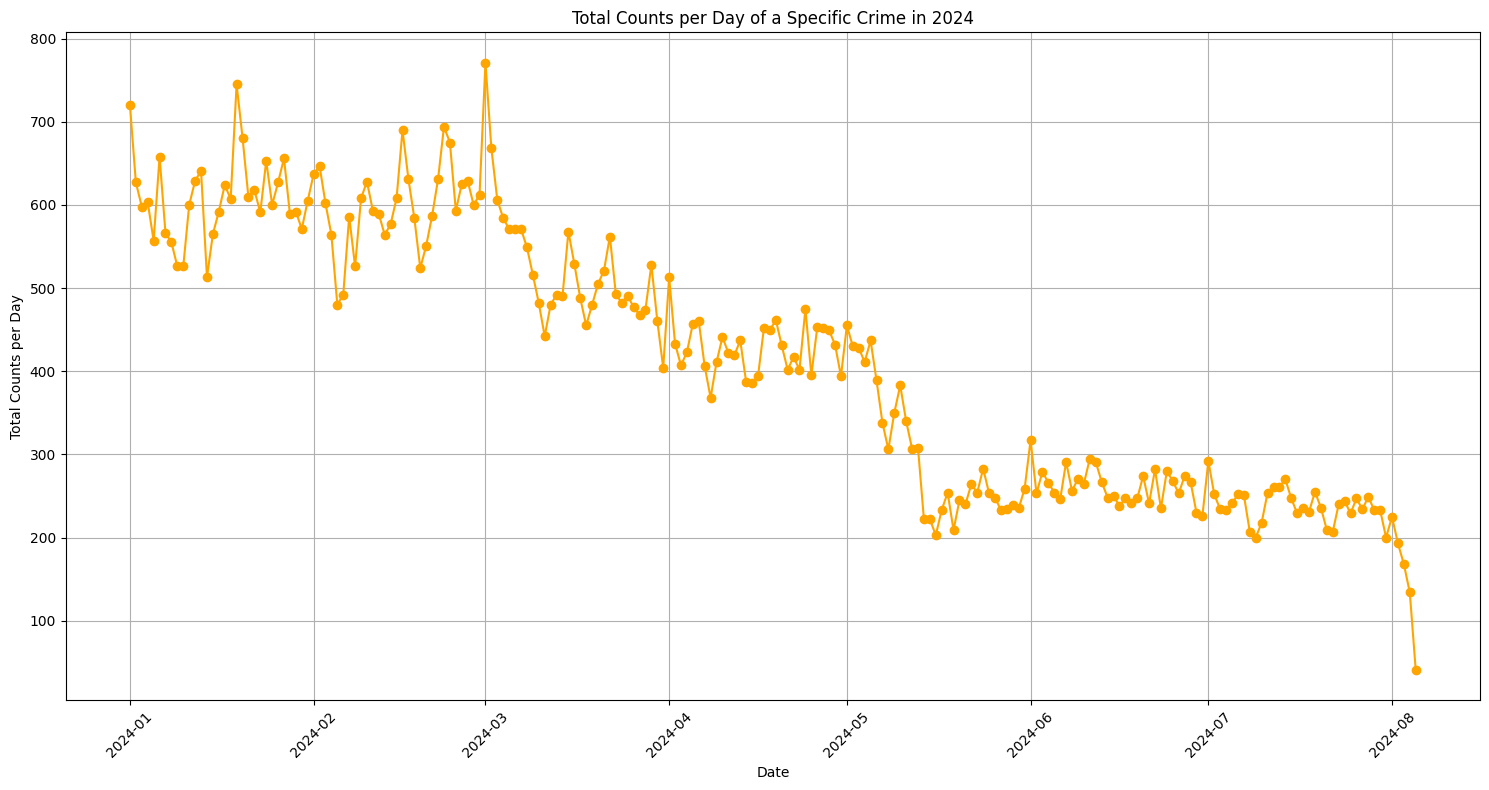

In [49]:
# Sort the aggregated data by date
aggregated_2024 = aggregated_2024.sort_values(by = "Date Occ")

# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(aggregated_2024["Date Occ"], aggregated_2024["total_count"], marker='o', color='orange', linestyle='-')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Counts per Day')
plt.title('Total Counts per Day of a Specific Crime in 2024')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# creating a function to calculate counts per year 
def calculate_crime_statistics(crime_data, crime_code, year):
    # Filter the crime data for the specified crime code and year
    cd_year = date_time_df[(date_time_df["Crm Cd"] == crime_code) & (date_time_df["Date Occ"].dt.year == year)]
    # Calculate the total counts for the year
    total_year = cd_year["Date Occ"].dt.year.value_counts()
    # Calculate the total counts per day
    total_per_day = cd_year["Date Occ"].value_counts()
    # Calculate the average per day
    average_per_day = total_per_day.mean()
    # Calculate the average number committed each week
    average_per_week = total_per_day.resample('W').sum().mean()
    # Calculate the average number committed each month
    average_per_month = total_per_day.resample('ME').sum().mean()
    return {
        "Total Counts for the Year": total_year,
        "Total Counts per Day": total_per_day,
        "Average per Day": round(average_per_day, 2),
        "Average per Week": round(average_per_week, 2),
        "Average per Month": round(average_per_month, 2)
    }

In [51]:
crime_statistics_2020 = calculate_crime_statistics(crime_2020, 510, 2020)
print(crime_statistics_2020)
# crime_statistics_2021 = calculate_crime_statistics(crime_2021, 510, 2021)
# print(crime_statistics_2021)
# crime_statistics_2022 = calculate_crime_statistics(crime_2022, 510, 2022)
# print(crime_statistics_2022)
# crime_statistics_2023 = calculate_crime_statistics(crime_2023, 510, 2023)
# print(crime_statistics_2023)
# crime_statistics_2024 = calculate_crime_statistics(crime_2024, 510, 2024)
# print(crime_statistics_2024)

{'Total Counts for the Year': Date Occ
2020    20772
Name: count, dtype: int64, 'Total Counts per Day': Date Occ
2020-07-17    89
2020-06-26    88
2020-06-13    85
2020-06-01    83
2020-06-05    83
              ..
2020-02-22    34
2020-01-01    33
2020-02-25    31
2020-02-12    29
2020-03-04    28
Name: count, Length: 366, dtype: int64, 'Average per Day': 56.75, 'Average per Week': 391.92, 'Average per Month': 1731.0}


In [52]:
# creating a function to filter data on a specific date and seeing what the top 5 crimes committed on that day 
def top_crimes_by_date(crime_data, date):

    # filter data frame based on the date provided 
    filtered_data = crime_data[crime_data["Date Occ"] == date]
    # getting the top crimes comitted on a specific daye
    top_crimes = filtered_data["Crm Cd"].value_counts().head(5)

    # returning the values for top_crimes
    return top_crimes

may_3_24 = top_crimes_by_date(crime_2024, "2024-05-03")

print("The top 5 crime codes that day were.")
print("------------------------------------")
print(may_3_24)


The top 5 crime codes that day were.
------------------------------------
Crm Cd
510    66
624    42
440    28
740    27
354    25
Name: count, dtype: int64


In [69]:
date_time_df["Month Occ"].value_counts()

Month Occ
January      92472
March        87620
February     86256
April        83346
July         83129
May          82805
June         81061
October      76227
August       76219
December     73440
September    72636
November     71740
Name: count, dtype: int64

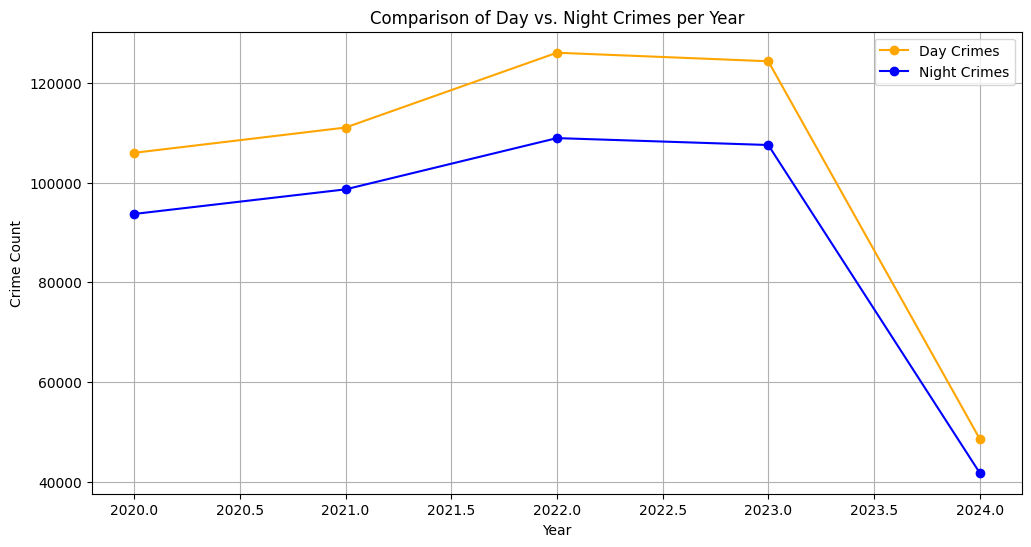

In [65]:
# Filter the DataFrame for the years 2020 to 2024
crime_data_2020_2024 = date_time_df[date_time_df["Year Occ"].between(2020, 2024)]
# Group the data by year and calculate the total number of "Day" and "Night" crimes
day_night_crime_count = crime_data_2020_2024.groupby(["Year Occ", "Day Or Night"])["Day Or Night"].count().unstack().fillna(0)

# Plot both "Day" and "Night" crime counts on the same graph
plt.figure(figsize=(12, 6))
plt.plot(day_night_crime_count.index, day_night_crime_count["Day"], marker='o', color='orange', label='Day Crimes')
plt.plot(day_night_crime_count.index, day_night_crime_count["Night"], marker='o', color='b', label='Night Crimes')
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Comparison of Day vs. Night Crimes per Year")
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

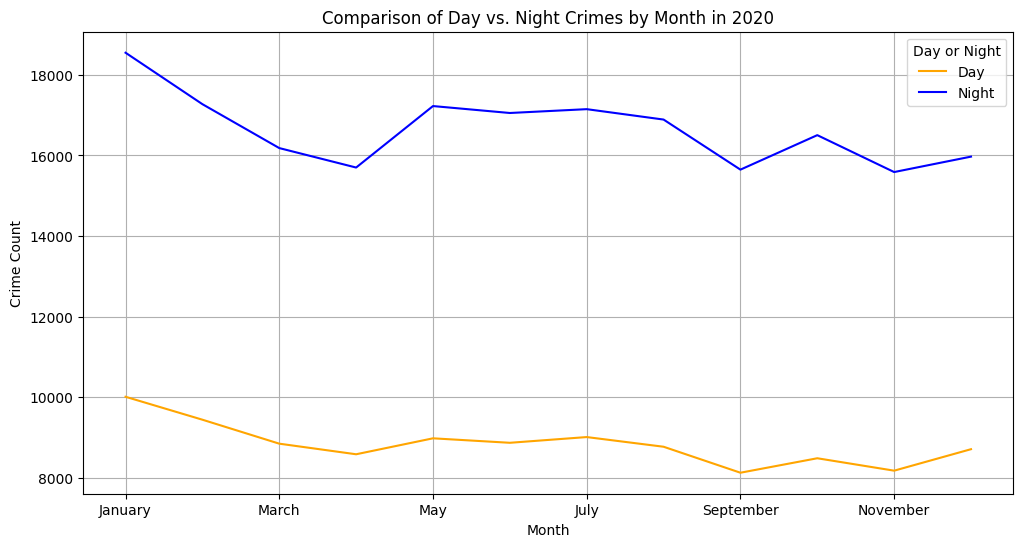

In [82]:
# crime_data_2020 = date_time_df[date_time_df["Year Occ"] == 2020]
# Group the data by year and calculate the total number of "Day" and "Night" crimes
day_night_crime_2020 = crime_2020.groupby(["Month Occ", "Day Or Night"])["Day Or Night"].count().unstack().fillna(0)

# Define the order of months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame based on the defined month order
day_night_crime_count_2020 = day_night_crime_2020.reindex(month_order)
plt.figure(figsize=(12, 6))
day_night_crime_count_2020.plot(kind='line', stacked=True, color=['orange', 'blue'], figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Comparison of Day vs. Night Crimes by Month in 2020")
plt.grid(True)
plt.legend(title="Day or Night", loc='upper right')
plt.show()

<Figure size 1200x600 with 0 Axes>

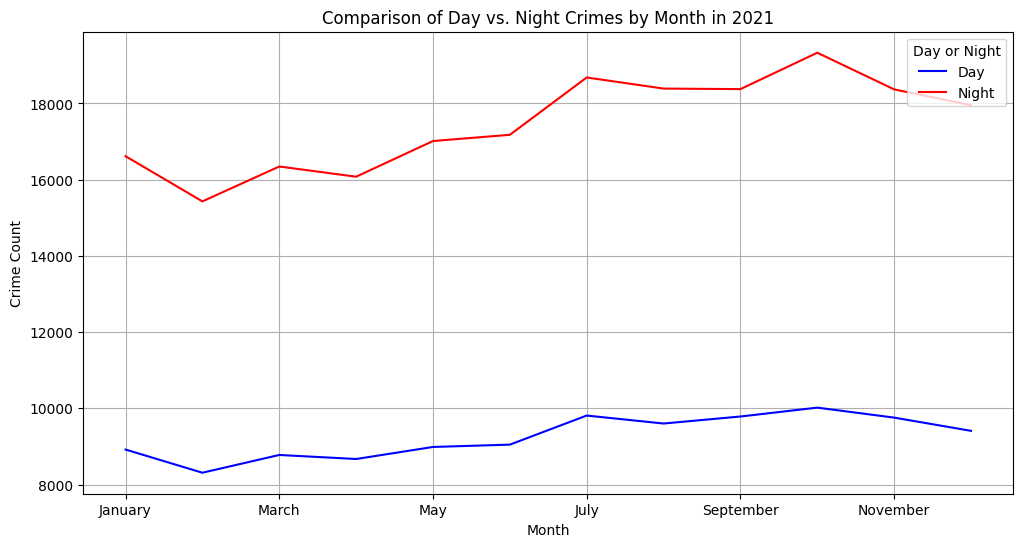

In [81]:
# Group the data by year and calculate the total number of "Day" and "Night" crimes
day_night_crime_2021 = crime_2021.groupby(["Month Occ", "Day Or Night"])["Day Or Night"].count().unstack().fillna(0)

# Define the order of months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame based on the defined month order
day_night_crime_count_2021 = day_night_crime_2021.reindex(month_order)
plt.figure(figsize=(12, 6))
day_night_crime_count_2021.plot(kind='line', stacked=True, color=['orange', 'blue'], figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Comparison of Day vs. Night Crimes by Month in 2021")
plt.grid(True)
plt.legend(title="Day or Night", loc='upper right')
plt.show()

<Figure size 1200x600 with 0 Axes>

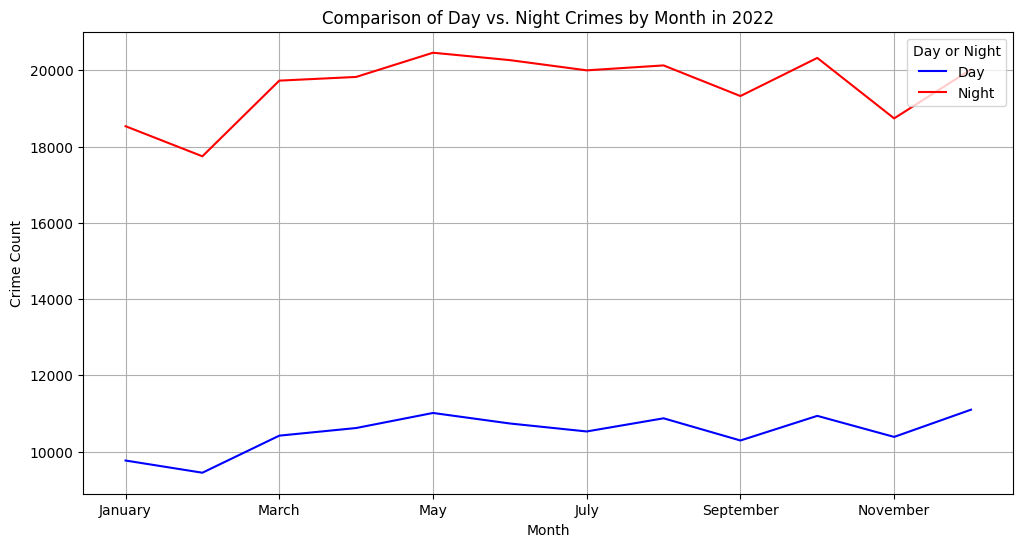

In [77]:
# Group the data by year and calculate the total number of "Day" and "Night" crimes
day_night_crime_2022 = crime_2022.groupby(["Month Occ", "Day Or Night"])["Day Or Night"].count().unstack().fillna(0)

# Define the order of months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame based on the defined month order
day_night_crime_count_2022 = day_night_crime_2022.reindex(month_order)
plt.figure(figsize=(12, 6))
day_night_crime_count_2022.plot(kind='line', stacked=True, color=['orange', 'blue'], figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Comparison of Day vs. Night Crimes by Month in 2022")
plt.grid(True)
plt.legend(title="Day or Night", loc='upper right')
plt.show()

<Figure size 1200x600 with 0 Axes>

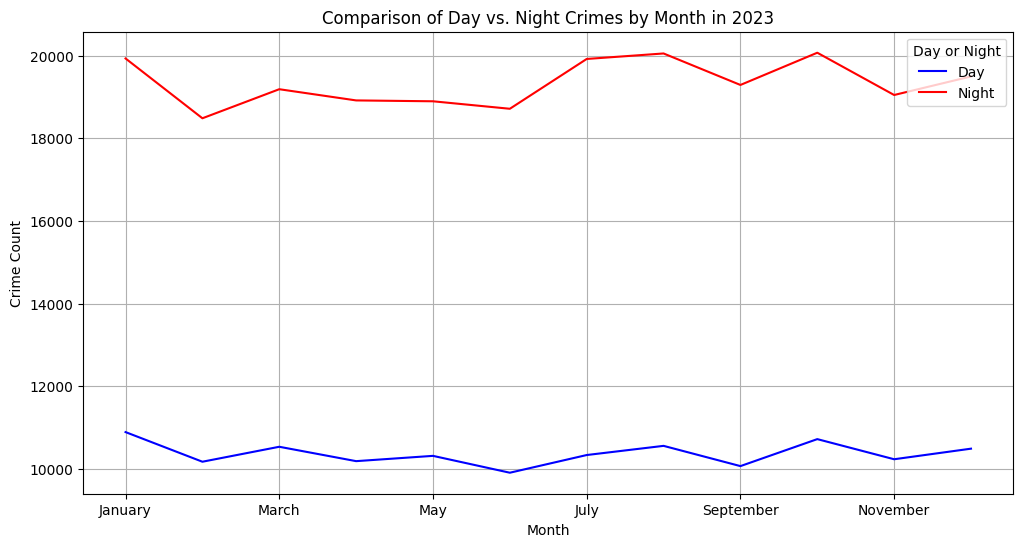

In [80]:
# Group the data by year and calculate the total number of "Day" and "Night" crimes
day_night_crime_2023 = crime_2023.groupby(["Month Occ", "Day Or Night"])["Day Or Night"].count().unstack().fillna(0)

# Define the order of months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame based on the defined month order
day_night_crime_count_2023 = day_night_crime_2023.reindex(month_order)
plt.figure(figsize=(12, 6))
day_night_crime_count_2023.plot(kind='line', stacked=True, color=['orange', 'blue'], figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Comparison of Day vs. Night Crimes by Month in 2023")
plt.grid(True)
plt.legend(title="Day or Night", loc='upper right')
plt.show()

<Figure size 1200x600 with 0 Axes>

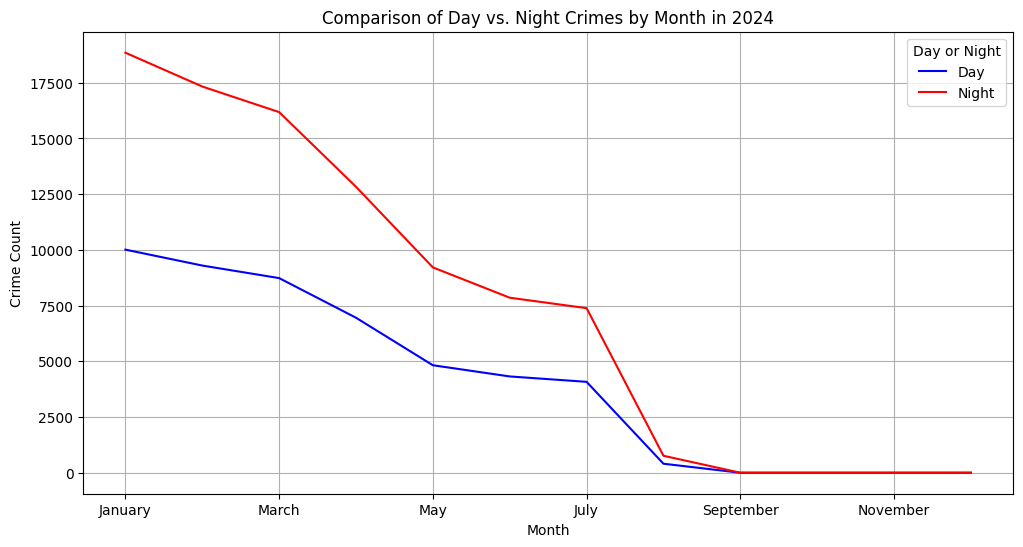

In [79]:
# Group the data by year and calculate the total number of "Day" and "Night" crimes
day_night_crime_2024 = crime_2024.groupby(["Month Occ", "Day Or Night"])["Day Or Night"].count().unstack().fillna(0)

# Define the order of months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame based on the defined month order
day_night_crime_count_2024 = day_night_crime_2024.reindex(month_order)
plt.figure(figsize=(12, 6))
day_night_crime_count_2024.plot(kind='line', stacked=True, color=['orange', 'blue'], figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Comparison of Day vs. Night Crimes by Month in 2024")
plt.grid(True)
plt.legend(title="Day or Night", loc='upper right')
plt.show()

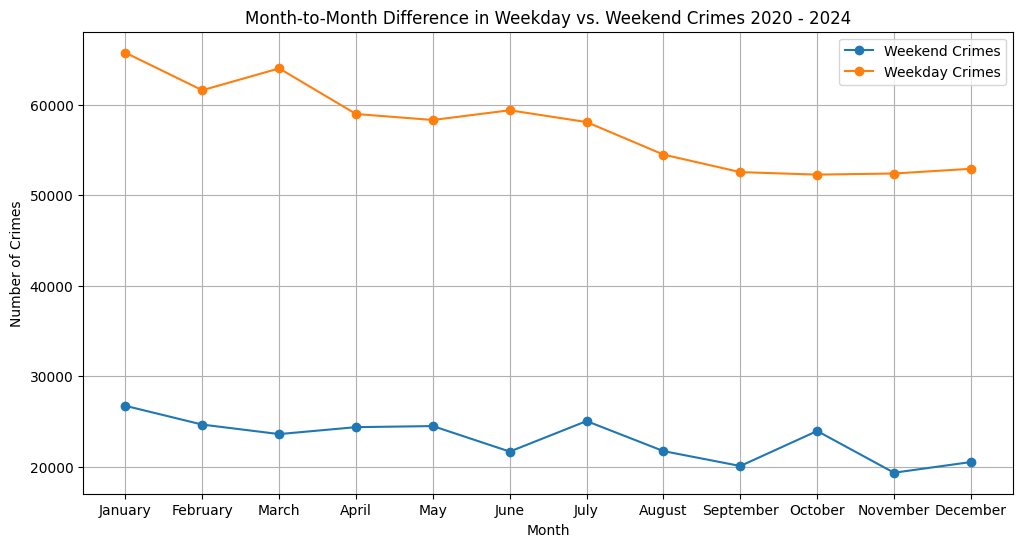

In [53]:
# Filter the DataFrame for weekends (Saturday and Sunday)
weekend_crimes = date_time_df[date_time_df["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Filter the DataFrame for weekdays (Monday to Friday)
weekday_crimes = date_time_df[~date_time_df["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Group the data by month and calculate the total number of crimes for weekdays and weekends
weekend_crime_count = weekend_crimes.groupby("Month Occ")["Day Type Crm Occ"].count()
weekday_crime_count = weekday_crimes.groupby("Month Occ")["Day Type Crm Occ"].count()

# Sort the index of weekend_crime_count and weekday_crime_count in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekend_crime_count = weekend_crime_count.reindex(month_order)
weekday_crime_count = weekday_crime_count.reindex(month_order)

# Create a line graph to show the month-to-month difference in weekday crimes and weekend crimes
plt.figure(figsize=(12, 6))
plt.plot(weekend_crime_count.index, weekend_crime_count, marker='o', label='Weekend Crimes')
plt.plot(weekday_crime_count.index, weekday_crime_count, marker='o', label='Weekday Crimes')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Month-to-Month Difference in Weekday vs. Weekend Crimes 2020 - 2024')
plt.legend()
plt.grid(True)

plt.show()

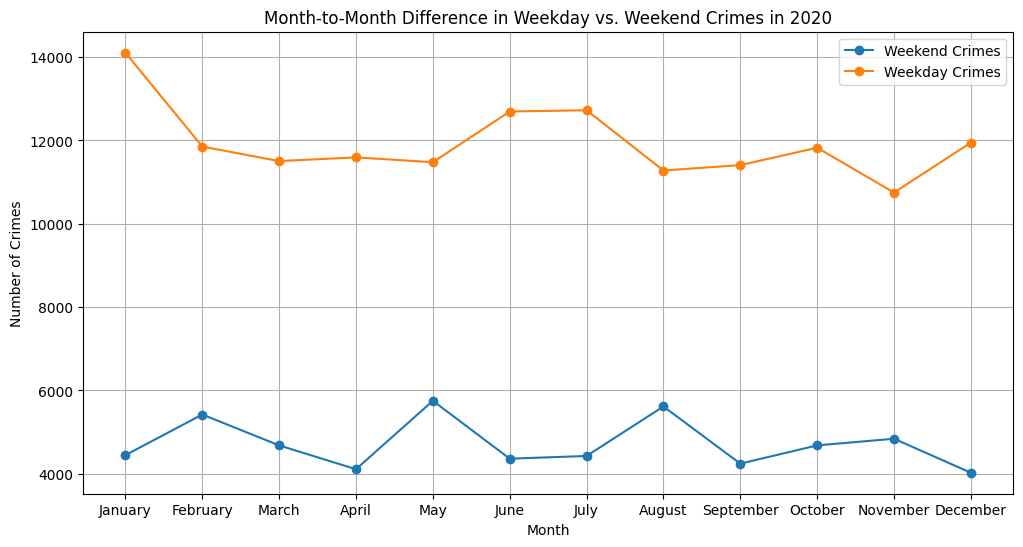

In [99]:
# Filter the DataFrame for weekends (Saturday and Sunday)
weekend_crimes_2020 = crime_2020[crime_2020["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Filter the DataFrame for weekdays (Monday to Friday)
weekday_crimes_2020 = crime_2020[~crime_2020["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Group the data by month and calculate the total number of crimes for weekdays and weekends
weekend_crime_count_2020 = weekend_crimes_2020.groupby("Month Occ")["Day Type Crm Occ"].count()
weekday_crime_count_2020 = weekday_crimes_2020.groupby("Month Occ")["Day Type Crm Occ"].count()

# Sort the index of weekend_crime_count and weekday_crime_count in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekend_crime_count_2020 = weekend_crime_count_2020.reindex(month_order)
weekday_crime_count_2020 = weekday_crime_count_2020.reindex(month_order)

# Create a line graph to show the month-to-month difference in weekday crimes and weekend crimes
plt.figure(figsize=(12, 6))
plt.plot(weekend_crime_count_2020.index, weekend_crime_count_2020, marker='o', label='Weekend Crimes')
plt.plot(weekday_crime_count_2020.index, weekday_crime_count_2020, marker='o', label='Weekday Crimes')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Month-to-Month Difference in Weekday vs. Weekend Crimes in 2020')
plt.legend()
plt.grid(True)

plt.show()


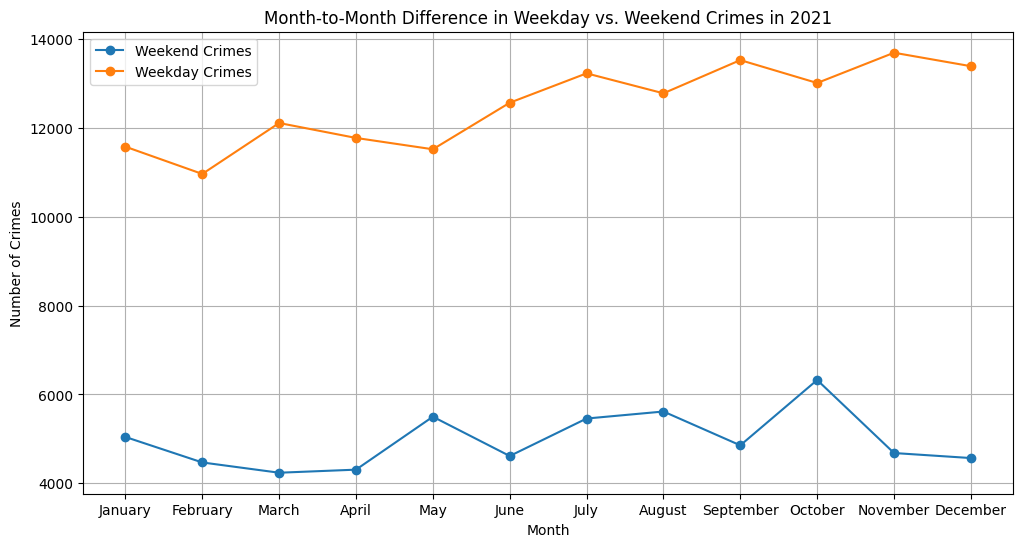

In [100]:
# Filter the DataFrame for weekends (Saturday and Sunday)
weekend_crimes_2021 = crime_2021[crime_2021["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Filter the DataFrame for weekdays (Monday to Friday)
weekday_crimes_2021 = crime_2021[~crime_2021["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Group the data by month and calculate the total number of crimes for weekdays and weekends
weekend_crime_count_21 = weekend_crimes_2021.groupby("Month Occ")["Day Type Crm Occ"].count()
weekday_crime_count_21 = weekday_crimes_2021.groupby("Month Occ")["Day Type Crm Occ"].count()

# Sort the index of weekend_crime_count and weekday_crime_count in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekend_crime_count_21 = weekend_crime_count_21.reindex(month_order)
weekday_crime_count_21 = weekday_crime_count_21.reindex(month_order)

# Create a line graph to show the month-to-month difference in weekday crimes and weekend crimes
plt.figure(figsize=(12, 6))
plt.plot(weekend_crime_count_21.index, weekend_crime_count_21, marker='o', label='Weekend Crimes')
plt.plot(weekday_crime_count_21.index, weekday_crime_count_21, marker='o', label='Weekday Crimes')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Month-to-Month Difference in Weekday vs. Weekend Crimes in 2021')
plt.legend()
plt.grid(True)

plt.show()

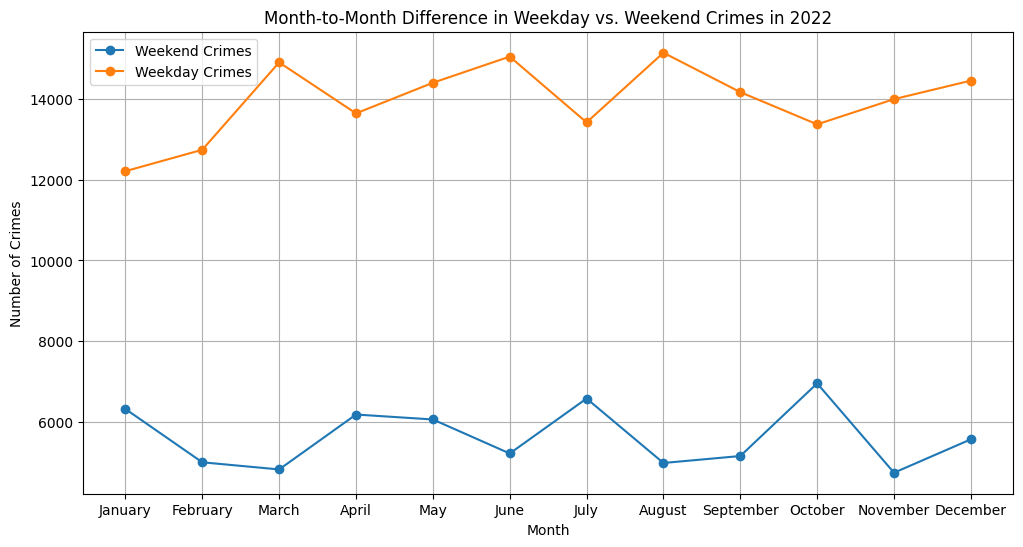

In [101]:
# Filter the DataFrame for weekends (Saturday and Sunday)
weekend_crimes_2022 = crime_2022[crime_2022["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Filter the DataFrame for weekdays (Monday to Friday)
weekday_crimes_2022 = crime_2022[~crime_2022["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Group the data by month and calculate the total number of crimes for weekdays and weekends
weekend_crime_count_22 = weekend_crimes_2022.groupby("Month Occ")["Day Type Crm Occ"].count()
weekday_crime_count_22 = weekday_crimes_2022.groupby("Month Occ")["Day Type Crm Occ"].count()

# Sort the index of weekend_crime_count and weekday_crime_count in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekend_crime_count_22 = weekend_crime_count_22.reindex(month_order)
weekday_crime_count_22 = weekday_crime_count_22.reindex(month_order)

# Create a line graph to show the month-to-month difference in weekday crimes and weekend crimes
plt.figure(figsize=(12, 6))
plt.plot(weekend_crime_count_22.index, weekend_crime_count_22, marker='o', label='Weekend Crimes')
plt.plot(weekday_crime_count_22.index, weekday_crime_count_22, marker='o', label='Weekday Crimes')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Month-to-Month Difference in Weekday vs. Weekend Crimes in 2022')
plt.legend()
plt.grid(True)

plt.show()

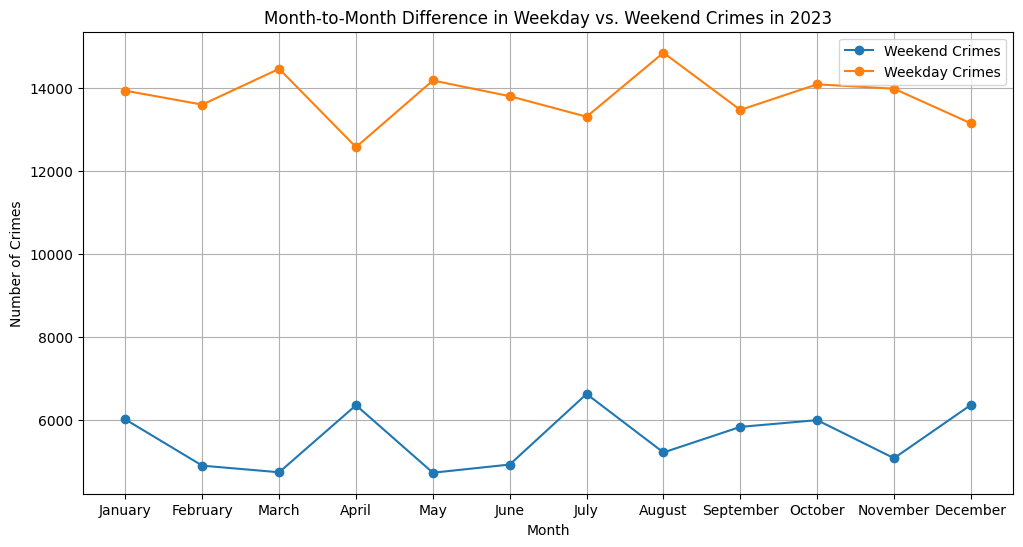

In [95]:
# Filter the DataFrame for weekends (Saturday and Sunday)
weekend_crimes_2023 = crime_2023[crime_2023["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Filter the DataFrame for weekdays (Monday to Friday)
weekday_crimes_2023 = crime_2023[~crime_2023["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Group the data by month and calculate the total number of crimes for weekdays and weekends
weekend_crime_count_23 = weekend_crimes_2023.groupby("Month Occ")["Day Type Crm Occ"].count()
weekday_crime_count_23 = weekday_crimes_2023.groupby("Month Occ")["Day Type Crm Occ"].count()

# Sort the index of weekend_crime_count and weekday_crime_count in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekend_crime_count_23 = weekend_crime_count_23.reindex(month_order)
weekday_crime_count_23 = weekday_crime_count_23.reindex(month_order)

# Create a line graph to show the month-to-month difference in weekday crimes and weekend crimes
plt.figure(figsize=(12, 6))
plt.plot(weekend_crime_count_23.index, weekend_crime_count_23, marker='o', label='Weekend Crimes')
plt.plot(weekday_crime_count_23.index, weekday_crime_count_23, marker='o', label='Weekday Crimes')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Month-to-Month Difference in Weekday vs. Weekend Crimes in 2023')
plt.legend()
plt.grid(True)

plt.show()

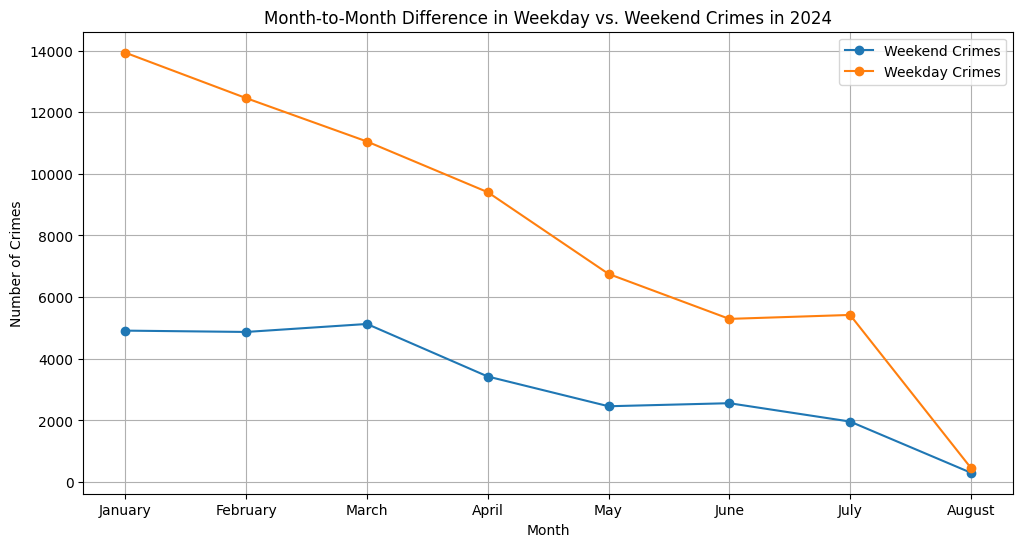

In [96]:
# Filter the DataFrame for weekends (Saturday and Sunday)
weekend_crimes_2024 = crime_2024[crime_2024["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Filter the DataFrame for weekdays (Monday to Friday)
weekday_crimes_2024 = crime_2024[~crime_2024["Day Of Wk Occ"].isin(["Saturday", "Sunday"])]

# Group the data by month and calculate the total number of crimes for weekdays and weekends
weekend_crime_count_24 = weekend_crimes_2024.groupby("Month Occ")["Day Type Crm Occ"].count()
weekday_crime_count_24 = weekday_crimes_2024.groupby("Month Occ")["Day Type Crm Occ"].count()

# Sort the index of weekend_crime_count and weekday_crime_count in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekend_crime_count_24 = weekend_crime_count_24.reindex(month_order)
weekday_crime_count_24 = weekday_crime_count_24.reindex(month_order)

# Create a line graph to show the month-to-month difference in weekday crimes and weekend crimes
plt.figure(figsize=(12, 6))
plt.plot(weekend_crime_count_24.index, weekend_crime_count_24, marker='o', label='Weekend Crimes')
plt.plot(weekday_crime_count_24.index, weekday_crime_count_24, marker='o', label='Weekday Crimes')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Month-to-Month Difference in Weekday vs. Weekend Crimes in 2024')
plt.legend()
plt.grid(True)

plt.show()

In [83]:
date_time_df["Crm Cd"].head()

0    510
1    330
2    480
3    343
4    354
Name: Crm Cd, dtype: int64

In [ ]:
aggregated_date_time = date_time_df.groupby("Day").size().reset_index(name='total_count')

In [ ]:
weekday = date_time_df["Day Type Crm Occ"] == "Weekday"
weekend = date_time_df["Day Type Crm Occ"] == "Weekend"
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(date_time_df['Day Type Crm Occ'], date_time_df['Crm Occ'], marker='o', color='b', linestyle='-')
plt.plot(date_time_df)
plt.title('Number of Crimes Committed During the Week and Weekend')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

In [ ]:
# 

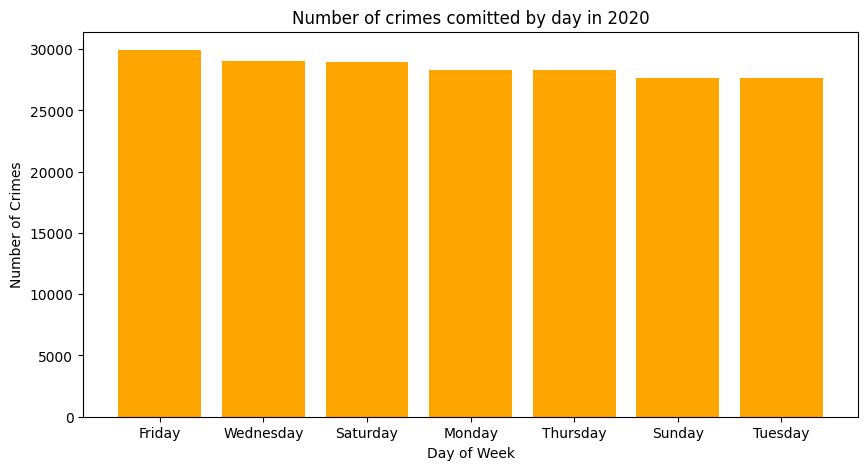

In [ ]:
# creating a bar graph to see the number of crimes comitted on specific days in crime_2020

# getting the value and item counts from the data frame
day_counts = crime_2020["Day Of Wk Occ"].value_counts()

# plotting the value counts to a bar graph
plt.figure(figsize=(10,5))
plt.bar(day_counts.index, day_counts.values, color = "orange", align = "center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Number of crimes comitted by day in 2020')
plt.show()

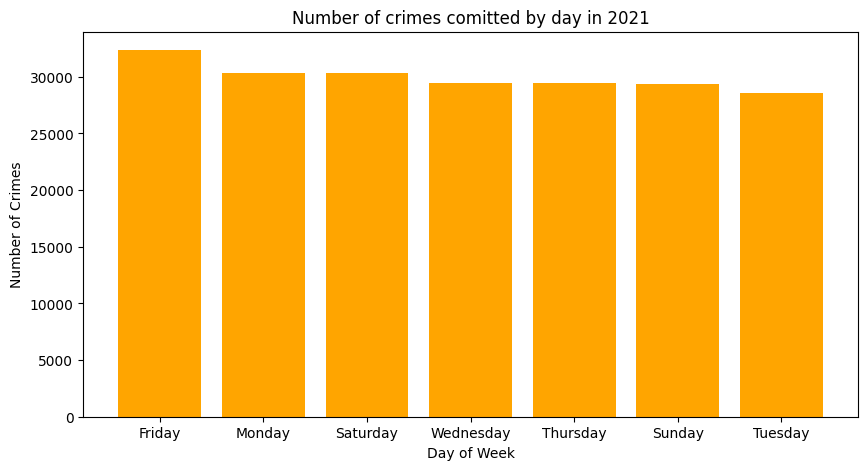

In [ ]:
# creating a bar graph to see the number of crimes comitted on specific days in crime_2021

# getting the value and item counts from the data frame
day_counts = crime_2021["Day Of Wk Occ"].value_counts()

# plotting the value counts to a bar graph
plt.figure(figsize = (10,5))
plt.bar(day_counts.index, day_counts.values, color = "orange", align = "center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Number of crimes comitted by day in 2021')
plt.show()

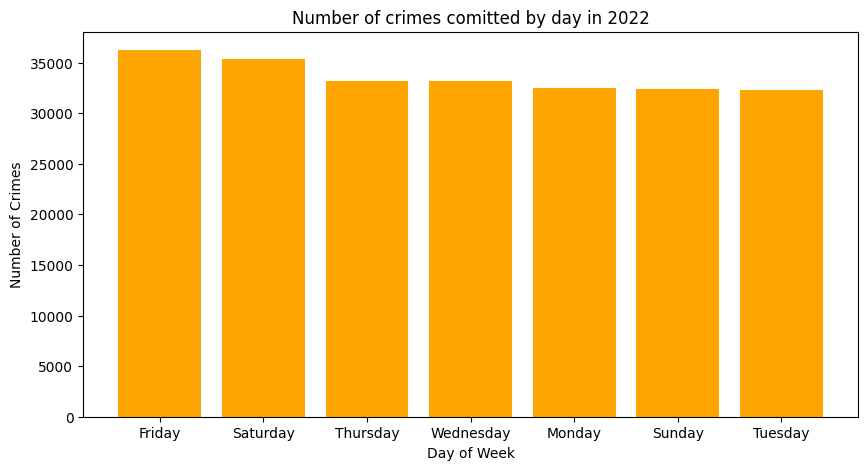

In [ ]:
# creating a bar graph to see the number of crimes comitted on specific days in 2022_test

# getting the value and item counts from the data frame
day_counts = crime_2022["Day Of Wk Occ"].value_counts()

# plotting the value counts to a bar graph
plt.figure(figsize = (10,5))
plt.bar(day_counts.index, day_counts.values, color = "orange", align = "center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Number of crimes comitted by day in 2022')
plt.show()

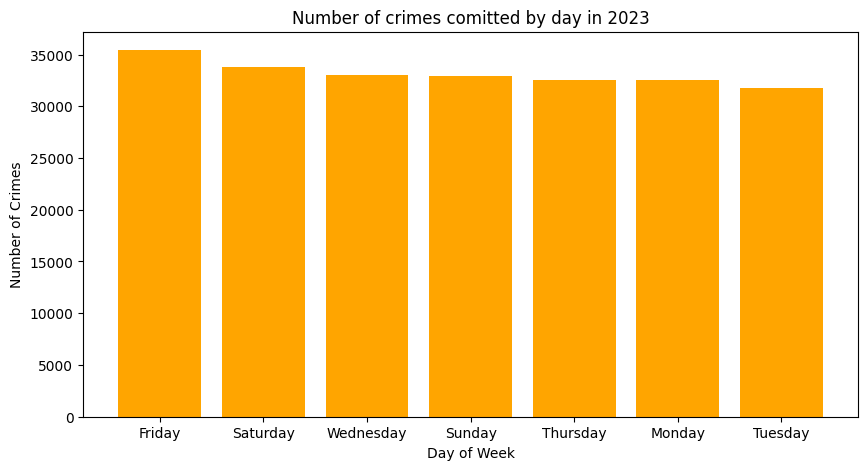

In [ ]:
# creating a bar graph to see the number of crimes comitted on specific days in 2021_test

# getting the value and item counts from the data frame
day_counts = crime_2023["Day Of Wk Occ"].value_counts()

# plotting the value counts to a bar graph
plt.figure(figsize=(10,5))
plt.bar(day_counts.index, day_counts.values, color= "orange", align="center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Number of crimes comitted by day in 2023')
plt.show()

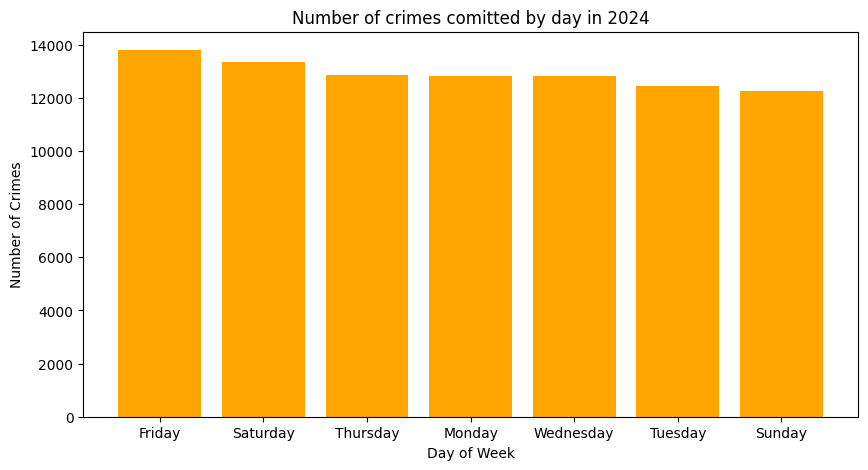

In [ ]:
# creating a bar graph to see the number of crimes comitted on specific days in 2021_test

# getting the value and item counts from the data frame
day_counts = crime_2024["Day Of Wk Occ"].value_counts()

# plotting the value counts to a bar graph
plt.figure(figsize=(10,5))
plt.bar(day_counts.index, day_counts.values, color = "orange", align = "center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Number of crimes comitted by day in 2024')
plt.show()

In [ ]:
# creating a data frame to hold crime code and day of week
day_Cd510 = crime_2020[["Day Of Wk Occ", "Crm Cd"]]

# Set the index to be "Day Of Wk Occ" so they will be used as labels
day_Cd510 = day_Cd510.set_index("Day Of Wk Occ")

# creating a test DF to try code 
day_Cd510 = day_Cd510.sample(n=5000, random_state=1)
day_Cd510.head()

day_Cd510.plot(kind="bar", figsize=(20,3.5))

# Set a title for the chart
plt.title("510")

plt.show()
plt.tight_layout()

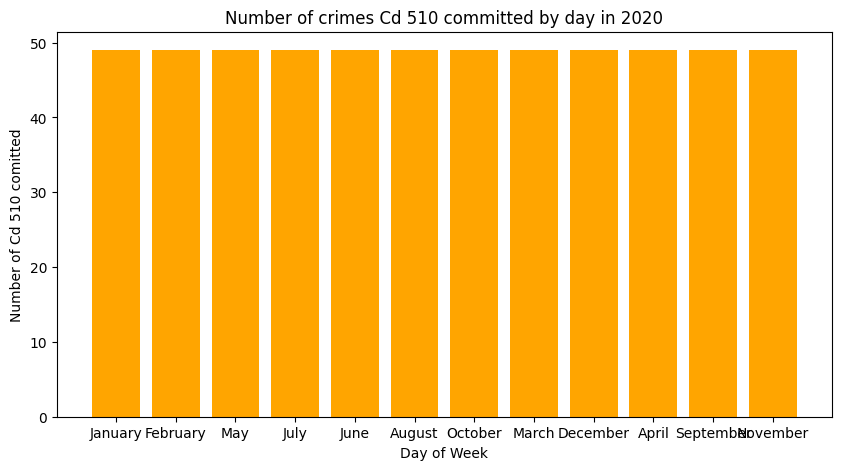

In [ ]:
#getting the value counts of a specific value
day_counts = crime_2020["Month Occ"].value_counts()
cd_counts = day_Cd510[day_Cd510["Crm Cd"] == 946].value_counts()

# creating a bar graph to show the number of cd_501 crimes comitted by day of the week
plt.figure(figsize=(10,5))
plt.bar(day_counts.index, cd_counts.values, color = "orange", align = "center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Cd 510 comitted')
plt.title('Number of crimes Cd 510 committed by day in 2020')
plt.show()

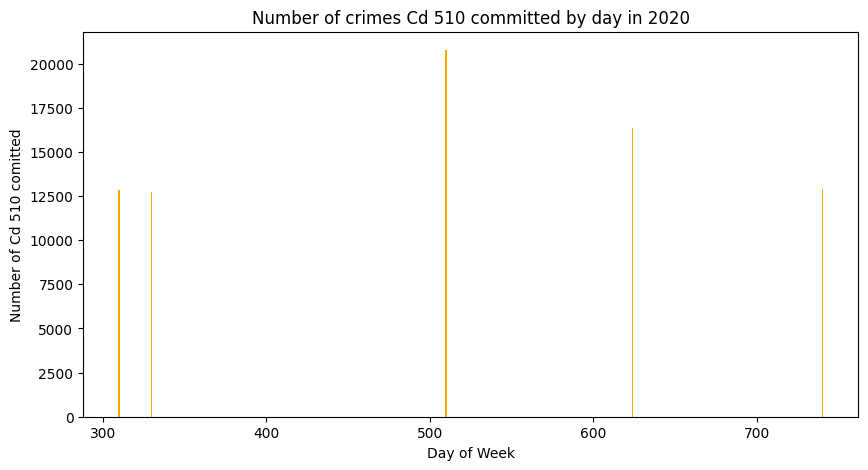

In [ ]:
Cd_counts = crime_2020["Crm Cd"].value_counts().head()
plt.figure(figsize=(10,5))
plt.bar(Cd_counts.index, Cd_counts.values, color = "orange", align = "center")
plt.xlabel('Day of Week')
plt.ylabel('Number of Cd 510 comitted')
plt.title('Number of crimes Cd 510 committed by day in 2020')
plt.show()


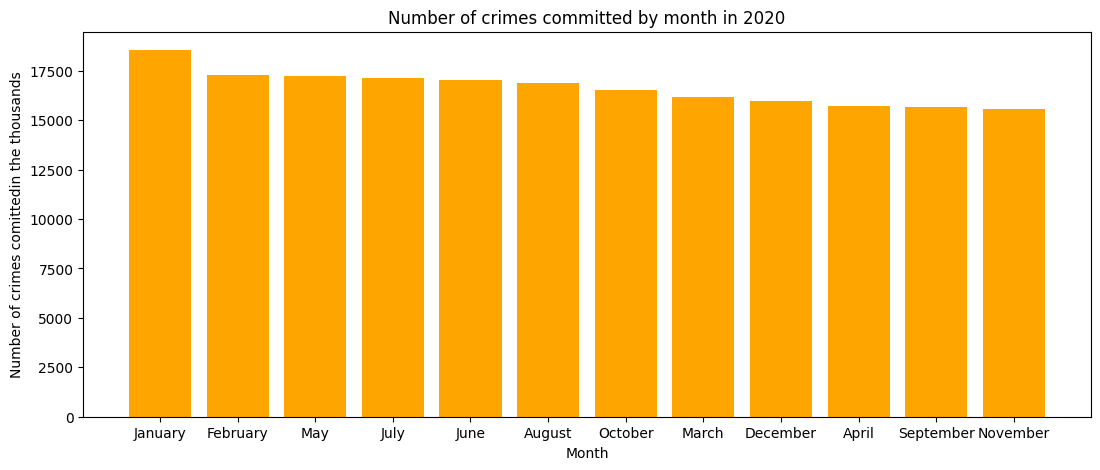

In [ ]:
# getting the number of the top 5 most comitted crimes and charting them in a graph

#getting the value counts of a specific value
day_counts = crime_2020["Month Occ"].value_counts()

# creating a bar graph to show the number of cd_501 crimes comitted by day of the week
plt.figure(figsize=(13,5))
plt.bar(day_counts.index, day_counts.values, color = "orange", align = "center")
plt.xlabel('Month')
plt.ylabel('Number of crimes comittedin the thousands')
plt.title('Number of crimes committed by month in 2020')
plt.show()